In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_heat_map(data, ylabels, DisplayXProb = True, DisplayYProb = True, show_cbar=True):

    ''' 
    This function plots a heat map given a 2D numpy array.  The array elements relate 
    to the amount of times a certain sequence of actions is used by students belonging to a 
    certain group at a certain time segment of their activity.
    
    Arguments:
    data: 2D numpy array (data.shape = n*m, where n is len(ylabels) and m is whatever time segment resolution used)
    
    ylabels: list of strings to label the y-axis of heat-map (i.e. the 2 student groups compared)
    By default plot_heat_map will also display the probabilities used in entropy calc corresponding
    to each row and column of data array (on the side of the plot opposite the x/ylabels).
    i.e. probabilities that sequence is used by a certain group over all time 
    and probabilities that sequence is used for a certain time segment over all groups 
    
    show_cbar: show colorbar to the left of plot
    '''

    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues, alpha=0.8)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(data.shape[0]) + 0.5)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5)

    # Set the labels
    xlabels = map(str, np.arange(data.shape[1])+1) 
    ax.set_xticklabels(xlabels, fontweight='bold')
    ax.set_yticklabels(ylabels, fontweight='bold')

    # Create new axes that will show probability that sequence is used by a certain group over all time 
    total = np.sum(data).astype(float) #total number of students that used sequence
    if DisplayXProb == True:
        probx = np.sum(data, axis=0)/total
        xlabels2 = list("%.2f" % px for px in probx)
        ax2 = ax.twiny()
        ax2.xaxis.tick_bottom()
        ax2.invert_yaxis()
        ax2.set_frame_on(False)
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(np.arange(data.shape[1]) + 0.5)
        ax2.set_xticklabels(xlabels2)
        ax2.tick_params(
            axis='x',           # changes apply to both the x and y-axis
            which='both',       # both major and minor ticks are affected
            bottom='off',       # ticks along the those edges are off
            top='off') 

    # Create new axes that will show probability that sequence is used for a certain time segment over all groups 
    if DisplayYProb == True:
        proby = np.sum(data, axis=1)/total
        ylabels3 = list("%.2f" % py for py in proby)
        ax3 = ax.twinx()
        ax3.set_frame_on(False)
        ax3.set_ylim(ax.get_ylim())
        ax3.set_yticks(np.arange(data.shape[0]) + 0.5)
        ax3.set_yticklabels(ylabels3)	
        ax3.tick_params(
            axis='y',           # changes apply to both the x and y-axis
            which='both',       # both major and minor ticks are affected
            right='off',        # ticks along the those edges are off
            left='off') 

    # put time labels on top
    ax.xaxis.tick_top()
    # figure size 
    fig.set_size_inches(8, 2)
    # turn off the frame
    ax.set_frame_on(False)
    # rotate the xticks labels if needed
    # plt.xticks(rotation=90)
    # Turn off all the ticks
    ax.tick_params(
        axis='both',        # changes apply to both the x and y-axis
        which='both',       # both major and minor ticks are affected
        bottom='off',       # ticks along the those edges are off
        right='off', 
        left='off',
        top='off') 
    
    if show_cbar == True: # Add colorbar
        cbaxes = fig.add_axes([1, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
        cbar = fig.colorbar(heatmap, cax=cbaxes)
        cbarticks = [np.amin(data),(np.amin(data)+np.amax(data))/2,np.amax(data)]
        cbar.set_ticks(cbarticks)
        cbar.set_ticklabels(map(str, cbarticks))


In [3]:
def calc_entropy(data,axesnum=None):
    ''' 
    This function calculates total entropy of 2D numpy array. By default, it does not ignore one of the axis.
    
    Arguments:
    data: 2D numpy array
    axesnum: By default, will calculate entropy over both axes.  
    If 0, then entropy along axis=0 of data is calculated, i.e. for arrangement over time segments over all groups
    If 1, then entropy for arrangement over groups over all time is calculated.
    
    Warning: will give math error if any axis contains only zeros!!!
    '''
    total = np.sum(data).astype(float)
    prob_0 = np.sum(data, axis=0)/total
    prob_1 = np.sum(data, axis=1)/total

    entropy_0 = -np.sum( prob_0 * np.log(prob_0) / np.log(2) )
    entropy_1 = -np.sum( prob_1 * np.log(prob_1) / np.log(2) )

    if axesnum == 0:
        return entropy_0
    elif axesnum == 1:
        return entropy_1
    elif axesnum == None:
        return entropy_0 + entropy_1
    else:
        raise Exception("Invalid value for argument: axesnum can be 0,1 or None ")
        

[[5 9 1 7 2]
 [9 5 9 8 5]]
2.27222289302 0.970950594455 3.24317348748


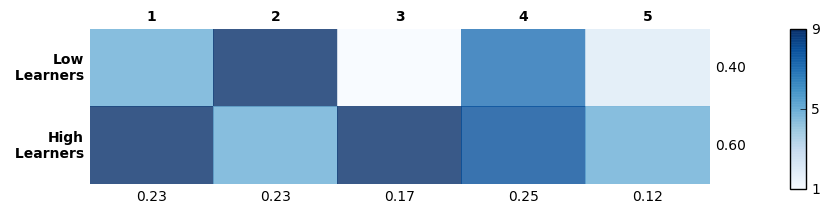

In [4]:
# Create fake data, plot heatmap with probabilities for each rows and columns
np.random.seed(499584)
data = np.random.randint(11, size=(2,5))
print data
ylabels = ['Low\n Learners', 'High\n Learners']
plot_heat_map(data, ylabels)
print calc_entropy(data,0), calc_entropy(data,1), calc_entropy(data)

1.14232310035 0.552495114325 1.69481821467


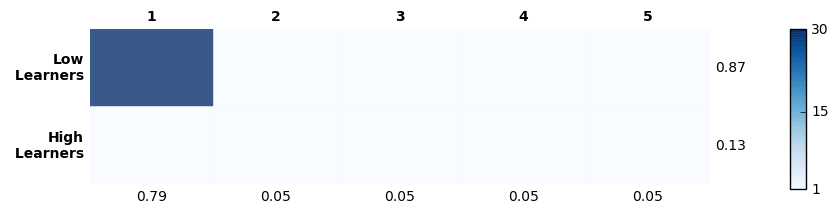

In [5]:
# Specific test examples
data = np.array([[30,1,1,1,1],[1,1,1,1,1]])
ylabels = ['Low\n Learners', 'High\n Learners']
plot_heat_map(data, ylabels)
print calc_entropy(data,0), calc_entropy(data,1), calc_entropy(data)

0.757853492184 1.0 1.75785349218


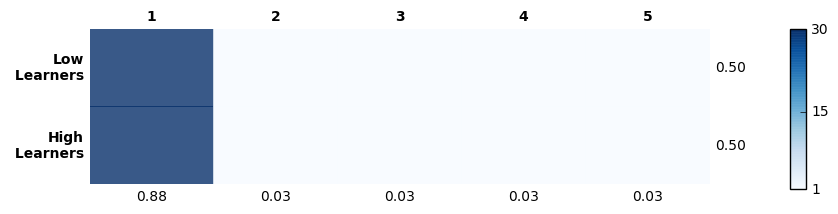

In [6]:
data = np.array([[30,1,1,1,1],[30,1,1,1,1]])
ylabels = ['Low\n Learners', 'High\n Learners']
plot_heat_map(data, ylabels)
print calc_entropy(data,0), calc_entropy(data,1), calc_entropy(data)

1.48216620531 1.0 2.48216620531


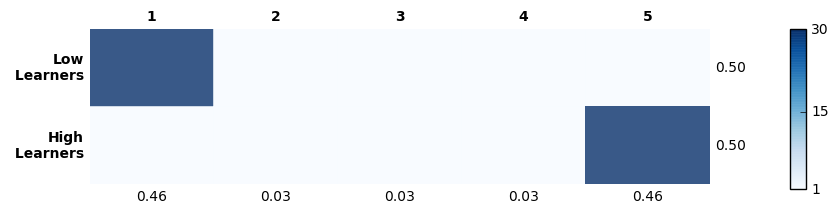

In [7]:
data = np.array([[30,1,1,1,1],[1,1,1,1,30]])
ylabels = ['Low\n Learners', 'High\n Learners']
plot_heat_map(data, ylabels)
print calc_entropy(data,0), calc_entropy(data,1), calc_entropy(data)

2.32192809489 1.0 3.32192809489


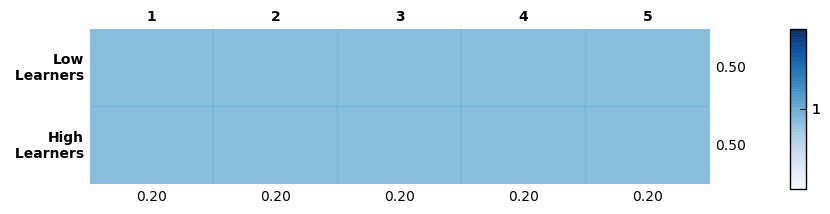

In [8]:
data = np.array([[1,1,1,1,1],[1,1,1,1,1]])
ylabels = ['Low\n Learners', 'High\n Learners']
plot_heat_map(data, ylabels)
print calc_entropy(data,0), calc_entropy(data,1), calc_entropy(data)

2.32192809489 0.439496986922 2.76142508181


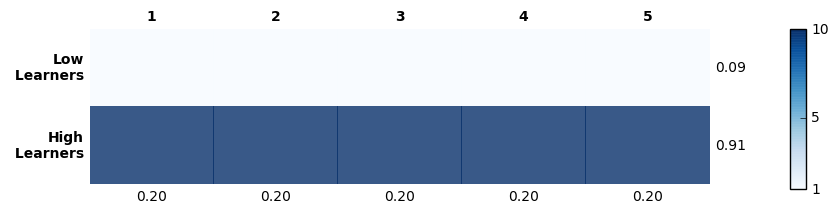

In [9]:
data = np.array([[1,1,1,1,1],[10,10,10,10,10]])
ylabels = ['Low\n Learners', 'High\n Learners']
plot_heat_map(data, ylabels)
print calc_entropy(data,0), calc_entropy(data,1), calc_entropy(data)